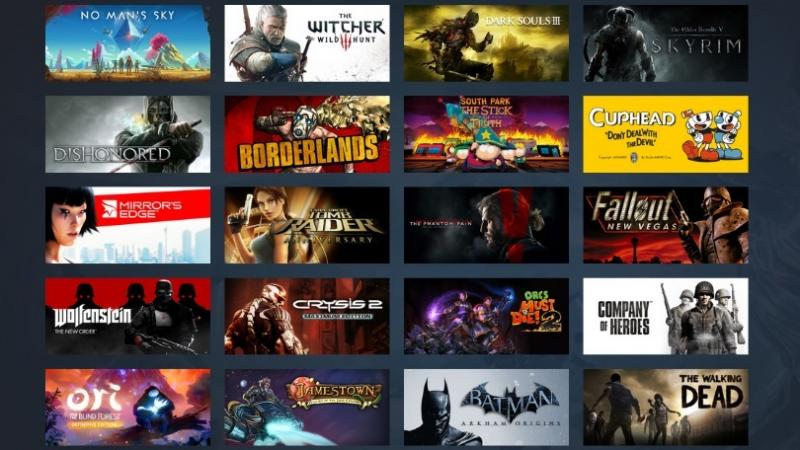

In [1]:
from IPython.display import Image
from IPython.display import display
display(Image(filename="/content/game.jpg",height=500,width=900))

In [2]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
# loading the data from the csv file to apandas dataframe
df=pd.read_csv('/content/imdb-videogames.csv')
df

,Unnamed: 0,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,0,Spider-Man,https://www.imdb.com/title/tt5807780/?ref_=adv...,2018.0,T,9.2,"20,759","When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,1,Red Dead Redemption II,https://www.imdb.com/title/tt6161168/?ref_=adv...,2018.0,M,9.7,"35,703",Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,"59,986",Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,3,God of War,https://www.imdb.com/title/tt5838588/?ref_=adv...,2018.0,M,9.6,"26,118","After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,4,Uncharted 4: A Thief's End,https://www.imdb.com/title/tt3334704/?ref_=adv...,2016.0,T,9.5,"28,722",Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20798,20798,"Enjoy Your Power, Enjoy Your Choice",https://www.imdb.com/title/tt3845606/?ref_=adv...,2014.0,NaN,NaN,NaN,Add a Plot,False,False,False,False,False,False,False,False,True
20799,20799,RedSun2020,https://www.imdb.com/title/tt0790739/?ref_=adv...,2004.0,NaN,NaN,NaN,Joseph gets kidnapped and it's the player's jo...,False,False,False,False,False,False,False,False,True
20800,20800,Shutter,https://www.imdb.com/title/tt5119948/?ref_=adv...,2015.0,NaN,NaN,NaN,A tech support man who uses a drone to investi...,False,False,False,False,False,False,False,False,True
20801,20801,The Music Machine,https://www.imdb.com/title/tt5142082/?ref_=adv...,2015.0,NaN,NaN,NaN,A young teenage girl and the ghost of a dead m...,False,False,False,False,False,False,False,False,True


In [4]:
# printing the first 5 rows of the dataframe
df.head()

,Unnamed: 0,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,0,Spider-Man,https://www.imdb.com/title/tt5807780/?ref_=adv...,2018.0,T,9.2,"20,759","When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,1,Red Dead Redemption II,https://www.imdb.com/title/tt6161168/?ref_=adv...,2018.0,M,9.7,"35,703",Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,"59,986",Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,3,God of War,https://www.imdb.com/title/tt5838588/?ref_=adv...,2018.0,M,9.6,"26,118","After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,4,Uncharted 4: A Thief's End,https://www.imdb.com/title/tt3334704/?ref_=adv...,2016.0,T,9.5,"28,722",Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False


In [5]:
# printing the last 5 rows of the dataframe
df.tail()

,Unnamed: 0,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
20798,20798,"Enjoy Your Power, Enjoy Your Choice",https://www.imdb.com/title/tt3845606/?ref_=adv...,2014.0,NaN,NaN,NaN,Add a Plot,False,False,False,False,False,False,False,False,True
20799,20799,RedSun2020,https://www.imdb.com/title/tt0790739/?ref_=adv...,2004.0,NaN,NaN,NaN,Joseph gets kidnapped and it's the player's jo...,False,False,False,False,False,False,False,False,True
20800,20800,Shutter,https://www.imdb.com/title/tt5119948/?ref_=adv...,2015.0,NaN,NaN,NaN,A tech support man who uses a drone to investi...,False,False,False,False,False,False,False,False,True
20801,20801,The Music Machine,https://www.imdb.com/title/tt5142082/?ref_=adv...,2015.0,NaN,NaN,NaN,A young teenage girl and the ghost of a dead m...,False,False,False,False,False,False,False,False,True
20802,20802,Cryptic,https://www.imdb.com/title/tt10964974/?ref_=ad...,2020.0,NaN,NaN,NaN,Kidnapped by an insane man and dragged into a ...,False,False,False,False,False,False,False,False,True


In [6]:
df.describe()

,Unnamed: 0,year,rating
count,20803.000000,20536.000000,11600.000000
mean,10401.000000,2005.568611,7.047526
std,6005.453161,11.846028,1.235204
min,0.000000,1952.000000,1.000000
25%,5200.500000,1997.000000,6.400000
50%,10401.000000,2008.000000,7.200000
75%,15601.500000,2016.000000,7.900000
max,20802.000000,2027.000000,9.700000


In [7]:
# number of rows and columns in the data frame
print("column count: ",df.shape[1])
print("Row count: ",df.shape[0])

column count:  17
Row count:  20803


In [8]:
df.isna().sum()

,0
Unnamed: 0,0
name,0
url,0
year,267
certificate,12900
rating,9203
votes,9203
plot,0
Action,0
Adventure,0


In [9]:
# selecting the relevant features for recommendation
selected_features=['name','year','rating','votes','plot','Action','Adventure','Comedy']
print(selected_features)

['name', 'year', 'rating', 'votes', 'plot', 'Action', 'Adventure', 'Comedy']


In [10]:
# replacing the null valuess with null string
for feature in selected_features:
   df[feature]=df[feature].fillna('').astype(str)

In [11]:
df.isna().sum()

,0
Unnamed: 0,0
name,0
url,0
year,0
certificate,12900
rating,0
votes,0
plot,0
Action,0
Adventure,0


In [12]:
# combining all the selected features
combined_features=df['name']+' '+df['year']+' '+df['rating']+' '+df['votes']+' '+df['plot']+ ' '+df['Action'] + ' '+df['Adventure'] + ' '+df['Comedy']


In [13]:
print(combined_features)

0        Spider-Man 2018.0 9.2 20,759 When a new villai...
1        Red Dead Redemption II 2018.0 9.7 35,703 Amids...
2        Grand Theft Auto V 2013.0 9.5 59,986 Three ver...
3        God of War 2018.0 9.6 26,118 After wiping out ...
4        Uncharted 4: A Thief's End 2016.0 9.5 28,722 T...
                               ...                        
20798    Enjoy Your Power, Enjoy Your Choice 2014.0   A...
20799    RedSun2020 2004.0   Joseph gets kidnapped and ...
20800    Shutter 2015.0   A tech support man who uses a...
20801    The Music Machine 2015.0   A young teenage gir...
20802    Cryptic 2020.0   Kidnapped by an insane man an...
Length: 20803, dtype: object


In [14]:
# converting the text data to feature vectors
vectorizer=TfidfVectorizer()

In [15]:
feature_vectors=vectorizer.fit_transform(combined_features)

In [16]:
print(feature_vectors)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 426411 stored elements and shape (20803, 30013)>
  Coords	Values
  (0, 24991)	0.36542677686953806
  (0, 16463)	0.25503294154023504
  (0, 393)	0.1127297845094052
  (0, 370)	0.1538845692472316
  (0, 1196)	0.26693792816540307
  (0, 28998)	0.12538264955642006
  (0, 18385)	0.21254305250719369
  (0, 28461)	0.19603062369528207
  (0, 26729)	0.1941157562539406
  (0, 29649)	0.17382185873285927
  (0, 5772)	0.2518509631461255
  (0, 19956)	0.20191654939549056
  (0, 19631)	0.21990244937843445
  (0, 2303)	0.16299816806213527
  (0, 29318)	0.16067925631604113
  (0, 6040)	0.21990244937843445
  (0, 26915)	0.05729062730414738
  (0, 23186)	0.12282043385415117
  (0, 26629)	0.04342241654081287
  (0, 26712)	0.18353514893058534
  (0, 12433)	0.22663655273680175
  (0, 16070)	0.2154955826599295
  (0, 17946)	0.10160273660729024
  (0, 22462)	0.1702740093548842
  (0, 27998)	0.1121238146869446
  :	:
  (20802, 29205)	0.09642735990742388
  (20802, 10583)	0.1

In [17]:
# getting the similarity scores using cosine similarity
similarity=cosine_similarity(feature_vectors)

In [18]:
print(similarity)

[[1.         0.03938621 0.06634383 ... 0.04989854 0.08720164 0.05552788]
 [0.03938621 1.         0.06347209 ... 0.04138635 0.1022244  0.03840795]
 [0.06634383 0.06347209 1.         ... 0.01824558 0.04672443 0.03981706]
 ...
 [0.04989854 0.04138635 0.01824558 ... 1.         0.09482825 0.03944887]
 [0.08720164 0.1022244  0.04672443 ... 0.09482825 1.         0.06255075]
 [0.05552788 0.03840795 0.03981706 ... 0.03944887 0.06255075 1.        ]]


In [19]:
print(similarity.shape)

(20803, 20803)


In [20]:
# getting the game name from the user
game_name=input(' Enter the game name : ')

 Enter the game name : spiderman


In [21]:
# creating a list with all the game names given in the dataset
list_of_all_names=df['name'].tolist()
print(list_of_all_names)


['Spider-Man', 'Red Dead Redemption II', 'Grand Theft Auto V', 'God of War', "Uncharted 4: A Thief's End", 'The Last of Us: Part II', 'Horizon Forbidden West', 'The Last of Us', 'Detroit: Become Human', 'Death Stranding', 'Ghost of Tsushima', 'Spider-Man: Miles Morales', 'Cyberpunk 2077', "Uncharted: Drake's Fortune", 'Batman: Arkham Knight', 'God of War: Ragnarök', 'Far Cry 6', 'Grand Theft Auto: San Andreas', 'MultiVersus', 'Far Cry 3', 'Star Wars Jedi: Fallen Order', 'Elden Ring', 'Xenoblade Chronicles 3', 'Uncharted: The Nathan Drake Collection', "Assassin's Creed Valhalla", "Marvel's Guardians of the Galaxy", 'Grand Theft Auto: Vice City', 'Uncharted 2: Among Thieves', 'The Witcher 3: Wild Hunt', 'Fallout: New Vegas', 'Command & Conquer: Red Alert 3', 'Horizon Zero Dawn', 'Red Dead Redemption', 'Call of Duty: Modern Warfare', 'Final Fantasy VII Remake', 'Genshin Impact', 'The Elder Scrolls V: Skyrim', 'Fallout 4', 'Yakuza: Like a Dragon', 'Days Gone', 'Squadron 42', 'Grand Theft A

In [22]:
# finding the close match for the game name given by the user
find_close_match=difflib.get_close_matches(game_name,list_of_all_names)
print(find_close_match)

['Spider-Man', 'Spider-Man', 'Spider-Man']


In [23]:
close_match=find_close_match[0]
print(close_match)

Spider-Man


In [24]:
# finding the index of the game with name
index_of_the_game=df[df.name == close_match].index[0]
print(index_of_the_game)

0


In [25]:
# getting a list of similar games
similarity_score=list(enumerate(similarity[index_of_the_game]))
print(similarity_score)

[(0, np.float64(1.0000000000000004)), (1, np.float64(0.03938620572992585)), (2, np.float64(0.06634382804674346)), (3, np.float64(0.07823157216487979)), (4, np.float64(0.17027694832601814)), (5, np.float64(0.01115775819026446)), (6, np.float64(0.06048178158871828)), (7, np.float64(0.03213690284444929)), (8, np.float64(0.030679459393542954)), (9, np.float64(0.05918367848345611)), (10, np.float64(0.06192151537461519)), (11, np.float64(0.3642398956184673)), (12, np.float64(0.05722293801432996)), (13, np.float64(0.03393690001923003)), (14, np.float64(0.08346508202013614)), (15, np.float64(0.021359365240443018)), (16, np.float64(0.008106993910527785)), (17, np.float64(0.05088199419948212)), (18, np.float64(0.0053672409146431985)), (19, np.float64(0.023971886673045405)), (20, np.float64(0.013253299725917229)), (21, np.float64(0.034721085380636015)), (22, np.float64(0.013878854673868018)), (23, np.float64(0.012360264874162195)), (24, np.float64(0.06658230658334653)), (25, np.float64(0.01535260

In [26]:
len(similarity_score)

20803

In [27]:
# sorting the games based on their similarity score
sorted_similar_games=sorted(similarity_score,key=lambda x:x[1],reverse=True)
print(sorted_similar_games)

[(0, np.float64(1.0000000000000004)), (17759, np.float64(0.9342434572247751)), (19326, np.float64(0.9342434572247751)), (10000, np.float64(0.9287441425067624)), (75, np.float64(0.3934226906829452)), (370, np.float64(0.38725292229923053)), (3353, np.float64(0.3764457548291378)), (11, np.float64(0.3642398956184673)), (17762, np.float64(0.3639146281544656)), (730, np.float64(0.3626253344764179)), (19390, np.float64(0.3613042724400831)), (248, np.float64(0.33934959060545133)), (194, np.float64(0.3368943726399711)), (6041, np.float64(0.30715032855499813)), (5944, np.float64(0.30600464015666407)), (707, np.float64(0.3030458969829971)), (613, np.float64(0.3015440675461016)), (134, np.float64(0.29473582515005764)), (726, np.float64(0.291506181803718)), (2376, np.float64(0.2864067265201218)), (1724, np.float64(0.2830934653725585)), (5934, np.float64(0.2820848265461313)), (15947, np.float64(0.2793025731764417)), (276, np.float64(0.27877126601912555)), (15938, np.float64(0.276718162901203)), (872

In [28]:
#print the name of similar games based on the index
print('Games suggested for you : \n')
i=1
for game in sorted_similar_games:
  index=game[0]
  title_from_index=df[df.index==index]['name'].values[0]
  if (i<10):
    print(i, '.',title_from_index)
    i+=1

Games suggested for you : 

1 . Spider-Man
2 . Spider-Man
3 . Spider-Man
4 . Spider-Man
5 . Spider-Man 2
6 . Spider-Man: Edge of Time
7 . Spider-Man
8 . Spider-Man: Miles Morales
9 . Spider-Man: Miles Morales
